In [ ]:
# IMPORTING THE LIBRARIES USED 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("/Users/parthbehl/machine learning/deeplearning /Employee_Attrition/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# FINDING MISSING VALUES IF FOUND ANY REPLACING THEM WITH THE MEAN/MODE OF THAT COLUMN

In [4]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#extra step if there were missing values found in our data
#we'll fill the missing : (1)numerical values with the mean of that column
#                         (2)categorical values with the mode              
 
# (1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['DailyRate'].fillna(data['DailyRate'].mean(), inplace=True)
data['DistanceFromHome'].fillna(data['DistanceFromHome'].mean(), inplace=True)
data['HourlyRate'].fillna(data['HourlyRate'].mean(), inplace=True)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(), inplace=True)
data['MonthlyRate'].fillna(data['MonthlyRate'].mean(), inplace=True)
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
data['PercentSalaryHike'].fillna(data['PercentSalaryHike'].mean(), inplace=True)
data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].mean(), inplace=True)
data['TrainingTimesLastYear'].fillna(data['TrainingTimesLastYear'].mean(), inplace=True)
data['YearsAtCompany'].fillna(data['YearsAtCompany'].mean(), inplace=True)
data['YearsInCurrentRole'].fillna(data['YearsInCurrentRole'].mean(), inplace=True)
data['YearsSinceLastPromotion'].fillna(data['YearsSinceLastPromotion'].mean(), inplace=True)
data['YearsWithCurrManager'].fillna(data['YearsWithCurrManager'].mean(), inplace=True)

# (2)
data['BusinessTravel'].fillna(data['BusinessTravel'].mode()[0], inplace=True)
data['Department'].fillna(data['Department'].mode()[0], inplace=True)
data['EducationField'].fillna(data['EducationField'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['JobRole'].fillna(data['JobRole'].mode()[0], inplace=True)
data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0], inplace=True)
data['OverTime'].fillna(data['OverTime'].mode()[0], inplace=True)

print(data.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# FINDING THE REASONS OF EMPLOYEE ATTRITION BY STUDYING AND PLOTTING THE DATA GIVEN

In [12]:
import plotly.express as px

income=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
income['MonthlyIncome']=round(income['MonthlyIncome'],-3)
income=income.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(income,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

In [13]:
age=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [14]:
yrs=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrs,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

In [15]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

<Axes: >

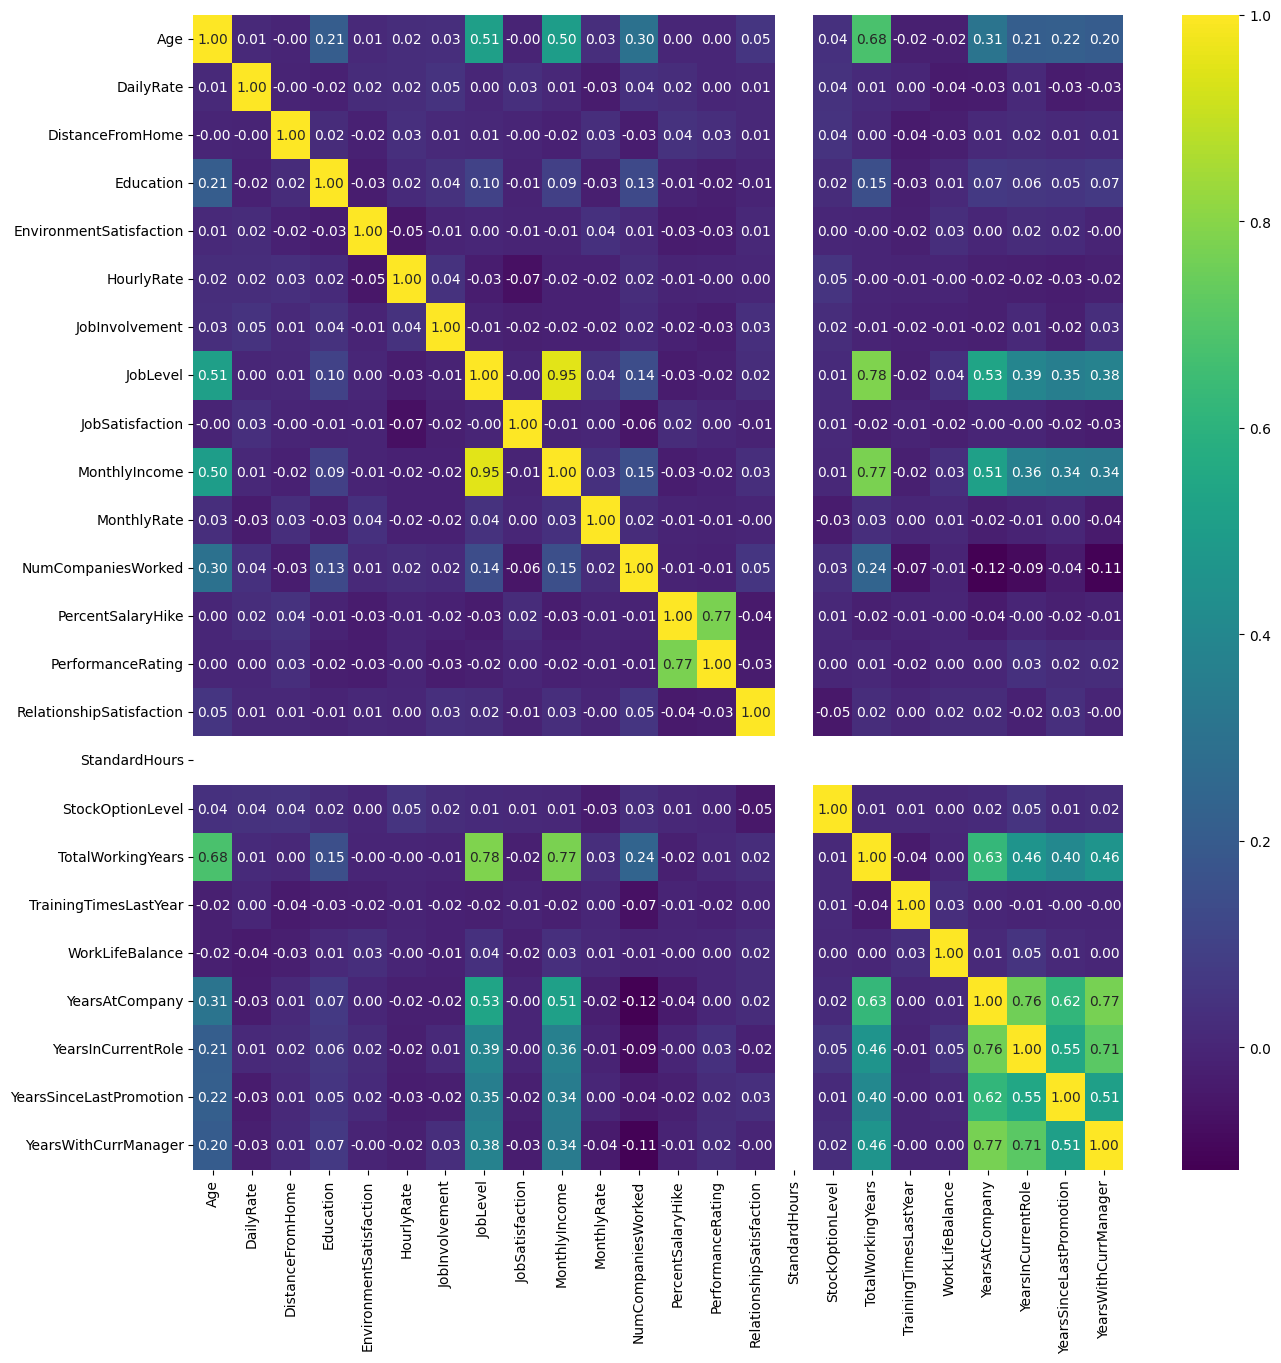

In [16]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

In [17]:
# Encoding categorical variables

label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
#splitting the data into test and training set

X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [19]:
# Standard Scaling numerical features

scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [20]:
# Displaying preprocessed data

print(X.head())
print(y.head())

        Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350        0.590048   0.742527    1.401512         -1.010909   
1  1.322365       -0.913194  -1.297775   -0.493817         -0.147150   
2  0.008343        0.590048   1.414363   -0.493817         -0.887515   
3 -0.429664       -0.913194   1.461466   -0.493817         -0.764121   
4 -1.086676        0.590048  -0.524295   -0.493817         -0.887515   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0  -0.891688       -0.937414            0.0       -1.701283   
1  -1.868426       -0.937414            0.0       -1.699621   
2  -0.891688        1.316673            0.0       -1.696298   
3   1.061787       -0.937414            0.0       -1.694636   
4  -1.868426        0.565311            0.0       -1.691313   

   EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
0                -0.660531  ...                 -1.584178            0.0   
1                 0.254625  ...     

In [21]:
#MODEL DEVELOPMENT 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#implementing gridsearchCV to find the best model for our dataset


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models with parameter grids
models = [
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'Gradient Boosting',
        'estimator': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(solver='liblinear'),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    {
        'name': 'Support Vector Machine',
        'estimator': SVC(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'estimator': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    {
        'name': 'Naive Bayes',
        'estimator': GaussianNB(),
        'params': {}
    }
]

# Reruning grid search for each model to find the best accuracy and parameter
best_model = None
best_accuracy = 0

for model_info in models:
    print(f"Searching best parameters for {model_info['name']}...")
    grid_search = GridSearchCV(model_info['estimator'], model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    mean_cv_score = grid_search.best_score_

    print(f"Best parameters: {best_params}")
    print(f"Best CV score: {mean_cv_score}")

    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_model = {
            'name': model_info['name'],
            'estimator': best_estimator,
            'params': best_params,
            'accuracy': accuracy
        }
        best_accuracy = accuracy

print(f"Best Model: {best_model['name']}")
print(f"Best Parameters: {best_model['params']}")
print(f"Best Accuracy: {best_model['accuracy']}")

Searching best parameters for Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.8571402812838083
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Searching best parameters for Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.8622538766678687
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.65      0.28      0.39        39

    accuracy                           0.88       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.87      0.

In [23]:
#displaying the results of the best model 


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the SVM model with the best parameters
svm_model = SVC(C=1, kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9013605442176871
Precision: 0.8919575076407374
Recall: 0.9013605442176871
F1 Score: 0.8851406158657336
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       255
           1       0.78      0.36      0.49        39

    accuracy                           0.90       294
   macro avg       0.84      0.67      0.72       294
weighted avg       0.89      0.90      0.89       294

